Goals of our project (best project ever):
<br>
Data from "A Polycomb-based switch underlying quantitative epigenetic memory"
<br>
In this article, the authors work on the flowering of Arabidopsis, depending on the temperature. In fact, the cold has an effect on the epigenetic of the FLC gene which regulates the floral initiation. In summer the nucleosomes of the gene are slowly activated (for example by acetylation) whereas with the cold they are inactivated (by methylation).The parts of the nucleosomes that can be methylated are the histones H3 (two per nucleosome). This mechanism allows a "winter memory": the gene FLC is more and more inhibited by methylation with the cold. When spring comes back it is still methylated, promoting the flowering. Then with the high temperature it is slowly activated, and so the flowering doesn't begin directly at the begining of spring. Also nucleosomes are affected by the states of their neighbors, which means that when a nucleosome is activated it increases the chance of its neighbors to be activated as well and so it is when a nucleosome is methulated.
<br>
The authors modeled these epigenetic modifications with mathematical functions and in this project we used their data to model the modifications in Python. However, we changed some elements to make them functional in our system and to match our model. Also the values of some variables were chosen arbitrarily.  
<br>
In this system, when the cold arrives, the histones change between 3 states. They start by being activated and then they change to an undefined state followed by a methylated state. Moreover, in winter the histones can be nucleated which increases their probability to be in a methylated state. On the contrary, when the weather is warm they have a chance to be enucleated and to go to an activated state. 

# General Scheme of the Used Model
![](Image1.png)
### Angel, A., Song, J., Dean, C., and Howard, M. (2011). A Polycomb-based switch underlying quantitative epigenetic memory. Nature 476, 105–108.

In [2]:
from random import*
import numpy as np
from pylab import*
import matplotlib.pyplot as plt

Here we give values to our variables. 
<br>
For "g", "eps", "Pdn", "C" and "K", the values come from the article.
<br>
For the other variables we choose the values 4 x g arbitrarily. 
<br>
Then we made four matrices, depending on different variables. In each matrix, 
$$\begin{pmatrix} A\rightarrow A & A\rightarrow U & A\rightarrow M \\ U\rightarrow A & U\rightarrow U & U\rightarrow M \\ M\rightarrow A & M\rightarrow U & M\rightarrow M \end{pmatrix}$$
M0 is the matrix for histones with no nucleation and non-depending on the other histones state.
In this matrix g illustrates the fact that when the histone is in an undefined state, it changes toward another state, methylation or activation, with the same probability.

$$\mathbf{M_0}$$
$$\hspace{10pt} \begin{matrix} \hspace{30pt} \color{Red}{\mathcal{A}}\hspace{30pt} & \color{Grey}{\mathcal{U}} \hspace{35pt} & \color{royalblue}{\mathcal{M}}\hspace{30pt} \end{matrix} \\
\begin{matrix} \color{Red}{\mathcal{A}} \\ \color{grey}{\mathcal{U}} \\\color{royalblue}{\mathcal{M}} \end {matrix} \begin{pmatrix} 1-x & x & 0 \\ y+0.5*g & 1-y-z-g & z+0.5*g \\ 0 & a & 1-a \end{pmatrix}$$
MT is the matrix for histones when we take into account their nucleation (which increases probability of methylation)

$$\mathbf{M_T}$$
$$\hspace{10pt} \begin{matrix} \hspace{12pt} \color{Red}{\mathcal{A}}\hspace{10pt} & \color{Grey}{\mathcal{U}} \hspace{10pt} & \color{royalblue}{\mathcal{M}}\hspace{5pt} \end{matrix} \\
\begin{matrix} \color{Red}{\mathcal{A}} \\ \color{grey}{\mathcal{U}} \\\color{royalblue}{\mathcal{M}} \end {matrix} 
\begin{pmatrix} -eps & 0 & eps \\ 0 & -eps & eps \\ 0 & 0 & 0 \end{pmatrix}$$
Mcoopa is the matrix of histones when one or two of their neighboors are $\color{red}{\mathsf{activated}}$, which increases its chances to be $\color{red}{\mathsf{activated}}$ itself

$$\mathbf{M_{coopa}}$$
$$\hspace{10pt} \begin{matrix} \hspace{5pt} \color{Red}{\mathcal{A}}\hspace{3pt} & \color{Grey}{\mathcal{U}} \hspace{2pt} & \color{royalblue}{\mathcal{M}}\hspace{1pt} \end{matrix} \\
\begin{matrix} \color{Red}{\mathcal{A}} \\ \color{grey}{\mathcal{U}} \\\color{royalblue}{\mathcal{M}} \end {matrix}
\begin{pmatrix} 0 & 0 & 0 \\ 1 & -1 & 0 \\ 0 & 1 & -1 \end{pmatrix}$$
Mcoopm is the matrix of histones when one or two of their neighbors are $\color{royalblue}{\mathsf{methylated}}$, which increases its chances to be $\color{royalblue}{\mathsf{methylated}}$ itself

$$\mathbf{M_{coopm}}$$
$$\hspace{10pt} \begin{matrix} \hspace{8pt} \color{Red}{\mathcal{A}}\hspace{3pt} & \color{Grey}{\mathcal{U}} \hspace{-1pt} & \color{royalblue}{\mathcal{M}}\hspace{0pt} \end{matrix} \\
\begin{matrix} \color{Red}{\mathcal{A}} \\ \color{grey}{\mathcal{U}} \\\color{royalblue}{\mathcal{M}} \end {matrix}
\begin{pmatrix} -1 & 1 & 0 \\ 0 & -1 & 1 \\ 0 & 0 & 0 \end{pmatrix}$$

$$M=M_0 + \theta\ M_T +(coopaM_{coopa}) +(coopmM_{coopm})$$

In [3]:
x=0.008
y=0.008
z=0.008
a=0.008
g=0.002
coopa=0.008
coopm=0.008
eps=0.6
Pdn=10**-4

C=10**-5
K=150

#on ne prend pas en compte eta et omega

M0=np.array([[1-x, x, 0], [y+0.5*g, 1-y-z-g, z+0.5*g], [0, a, 1-a]])
MT=np.array([[-eps, 0, eps], [0 ,-eps ,eps], [0, 0, 0]])
Mcoopa=np.array([[0,0,0],[1,-1,0],[0,1,-1]])
Mcoopm=np.array([[-1,1,0],[0,-1,1],[0,0,0]])

In [4]:
def evol(nuc,T,Pn):
    for i in range(2):
        if T==0:
            r=random()
            if r<=Pn:
                nuc[i,1]=1
        if T==1:
            r=random()
            if r<=Pdn:
                nuc[1]=0
        pourquoifairesimplequandonpeutfairecomplique=[0,1]
        pourquoifairesimplequandonpeutfairecomplique.remove(i)
        j=pourquoifairesimplequandonpeutfairecomplique[0]
        M=M0+nuc[i,1]*MT
        if nuc[j,0]==2:
            M=M0+nuc[i,1]*MT+coopm*Mcoopm
        if nuc[j,0]==0:
            M=M0+nuc[i,1]*MT+coopa*Mcoopa
        r=random()
        if r<=M[nuc[i,0],0] :
            nuc[i,0]=0
        elif r<=(M[nuc[i,0],0]+M[nuc[i,0],1]) :
            nuc[i,0]=1
        else :
            nuc[i,0]=2
    return(nuc)

def simulation(winter, spring,n=35): #winter et srping en jours
    L=np.array([[[0,0],[0,0]] for i in range(n)])
    liste=[]
    T=0
    for i in range(winter*1440):
        Pn=(C*(i**2)/(K*(1440**2)+i**2))
        for j in range(len(L)):
            L[j]=evol(L[j],T,Pn)
        if i%7200==0:
            liste.append(np.copy(L))
    T=1
    for i in range(spring*1440):
        for j in range(len(L)):
            L[j]=evol(L[j],T,Pn)
        if i%7200==0:
            liste.append(np.copy(L))
    return(liste)


In [5]:
n=simulation(10,10)

In [193]:
n

[array([[[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
        [[0, 0],
         [0, 0]],
 
 

In [214]:
len(n)
shape(n)

(4, 35, 2, 2)

In [6]:
def save_nuc(lis,name="list_of_all.txt"):
    np.savetxt(name, lis.flatten(), delimiter = ",")
    return
    

def load_nuc(name="list_of_all.txt"):    
    lisflat=genfromtxt(name, delimiter=",")
    lis=listflat.reshape((int(len(lisflat)/(35*2*2)),35,2,2))
    return (lis)


In [7]:
def unlist(L):
    M=[]
    for i in L:
        for j in i:
            M+=[j]
    return (M)

In [8]:
%matplotlib notebook
plt.ion()


        
def histo_nuc(p,fig):  
    p=np.ndarray.tolist(p)# liste pour count pour histo
    count ={}
    for state in [0,1,2]:
        for nucleation in [0,1]:
            count[(state, nucleation)]= p.count([state, nucleation])
    h = [1,2,3,4,5,6]
    BarName = ['[0, 0]','[0, 1]','[1, 0]','[1, 1]','[2, 0]','[2, 1]']
    fig.clf()
    for j,(state, nucleation) in enumerate(count.keys()):
        height=count[(state, nucleation)]
        absc=h[j]
        if state==0:
            fc='red'
        elif state==1:
            fc='grey'
        elif state==2:
            fc='royalblue'
        ha = "" if nucleation == 0 else "*"
        plt.bar(absc, height, 1.0, color=fc, hatch=ha)
    plt.xticks(h, BarName, rotation=40)
    plt.ylim(0,70)
    fig.canvas.draw()        
    return 



def draw(L):
    p=[]
    fig =plt.figure(0)
    for i,l in enumerate(L):
        p=unlist(l)
        p=np.array(p)
        #np.savetxt( "p"+str(i)+".txt",p, delimiter=",")
        histo_nuc(p,fig)
        fig.savefig('SimpleBar'+str(i)+'.png')
    return
    


<IPython.core.display.Javascript object>


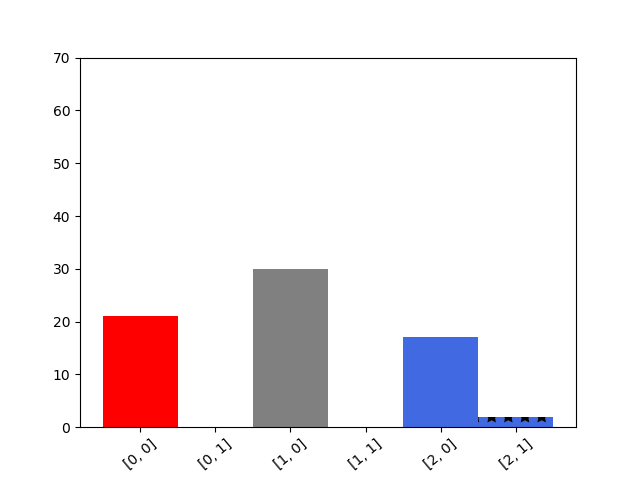

In [9]:
draw(n)

In [10]:
a = np.arange(12).reshape((3,2,2))
print(a)
print(np.concatenate(a,axis=0))

[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]]
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
